In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mikeio

In [ ]:
msh = mikeio.Mesh("../tests/testdata/odense_rough.mesh")
msh

<Mesh>
number of nodes: 399
number of elements: 654
projection: UTM-33

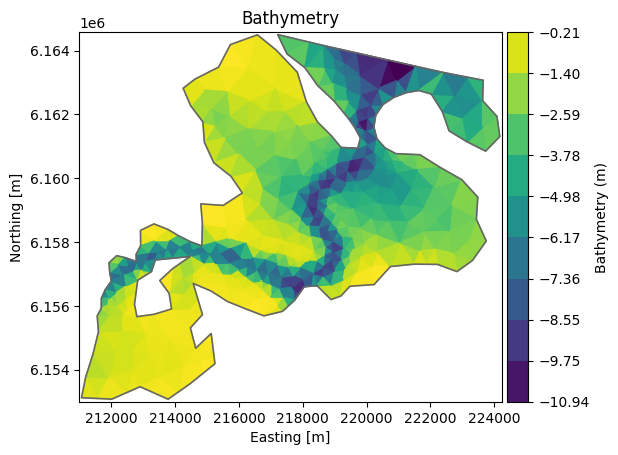

In [ ]:
msh.plot()

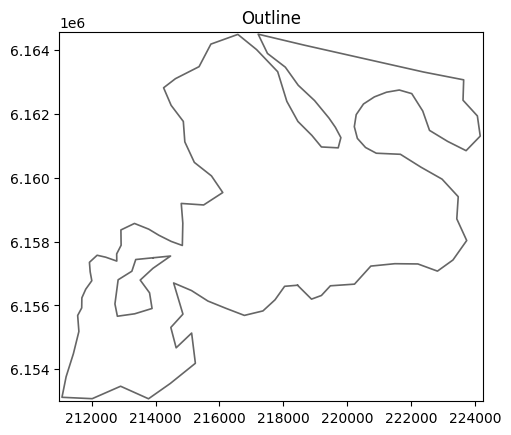

In [ ]:
msh.geometry.plot.outline()

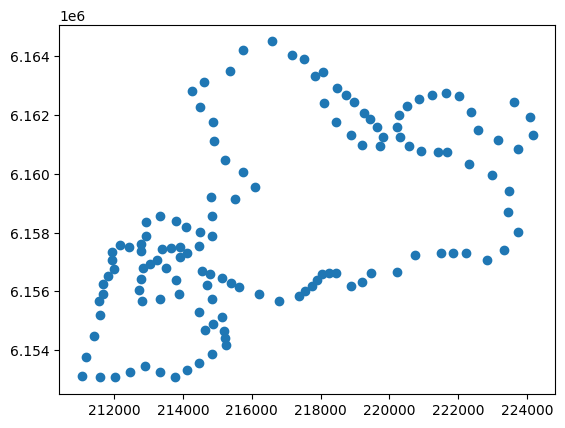

In [ ]:
ncland = msh.node_coordinates[msh.codes==1]

plt.scatter(ncland[:,0], ncland[:,1])

In [ ]:
ec = msh.element_coordinates

In [ ]:
d = np.min(np.sqrt((ec[:, np.newaxis, 0] - ncland[:, 0])**2 + 
                    (ec[:, np.newaxis, 1] - ncland[:, 1])**2), axis=1)

In [ ]:
import marimo as mo

# Dfsu - Distance to land
Calculate the distance to land for each element in mesh and save to dfsu file

## Get a list of land nodes

## Get element coordinates

## Calculate distance to nearest land node

In [ ]:
name = mo.ui.text(placeholder="Distance to land")
name

&lt;marimo-text data-initial-value=&#x27;&amp;quot;&amp;quot;&#x27; data-label=&#x27;null&#x27; data-placeholder=&#x27;&amp;quot;Distance to land&amp;quot;&#x27; data-kind=&#x27;&amp;quot;text&amp;quot;&#x27; data-full-width=&#x27;false&#x27; data-disabled=&#x27;false&#x27; data-debounce=&#x27;true&#x27;&gt;&lt;/marimo-text&gt;

In [ ]:
da = mikeio.DataArray(data=d,
                      geometry=msh.geometry,
                      item=mikeio.ItemInfo(name.value, mikeio.EUMType.Distance, mikeio.EUMUnit.meter))
da

<mikeio.DataArray>
name: 
dims: (element:654)
time: 2018-01-01 00:00:00 (time-invariant)
geometry: Dfsu2D (654 elements, 399 nodes)
values: [1697, 435, ..., 1194]

In [ ]:
threshold = mo.ui.slider(500,2000,100)
threshold

&lt;marimo-slider data-initial-value=&#x27;500&#x27; data-label=&#x27;null&#x27; data-start=&#x27;500&#x27; data-stop=&#x27;2000&#x27; data-step=&#x27;100&#x27; data-steps=&#x27;[]&#x27; data-debounce=&#x27;false&#x27; data-orientation=&#x27;&amp;quot;horizontal&amp;quot;&#x27; data-show-value=&#x27;false&#x27; data-full-width=&#x27;false&#x27;&gt;&lt;/marimo-slider&gt;

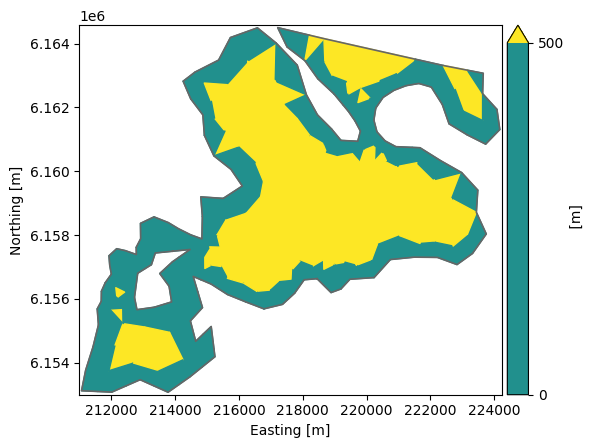

In [ ]:
da.plot(title="", levels=[0,threshold.value])